In [833]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import torch.nn as nn
import torch

In [834]:
df=pd.read_csv('heart_disease_dataset.csv', sep=';')
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [836]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [837]:
len(df.columns)

14

In [838]:
import matplotlib.pyplot as plt

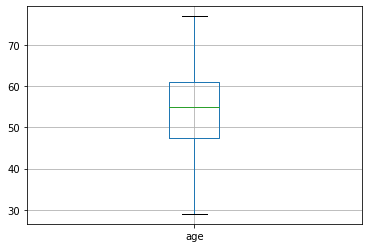

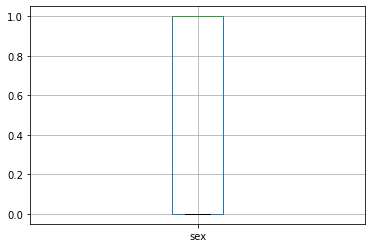

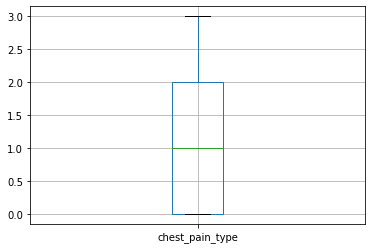

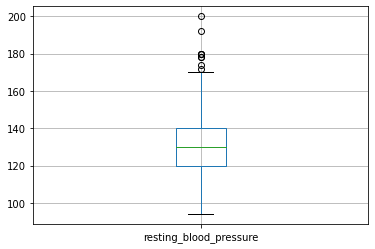

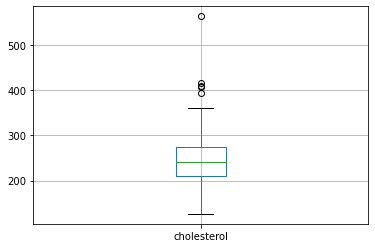

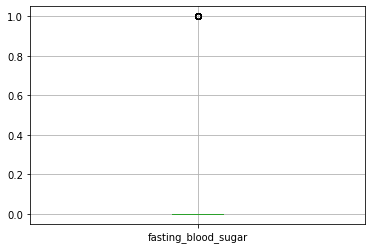

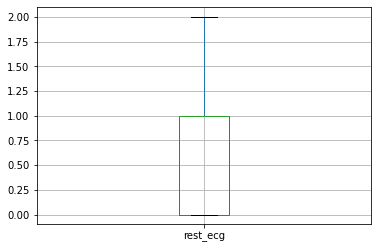

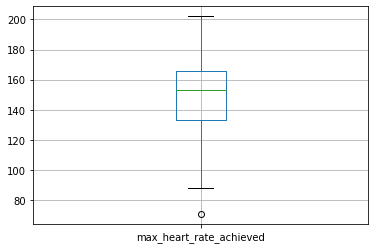

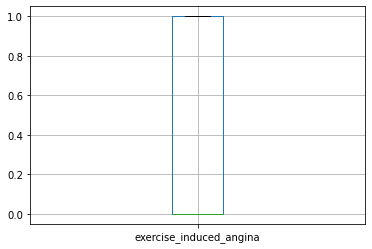

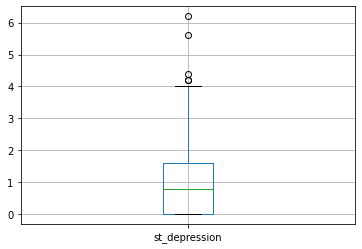

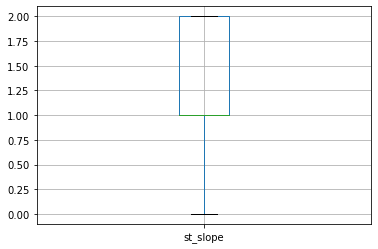

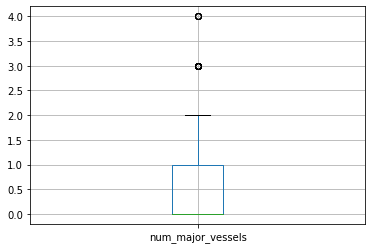

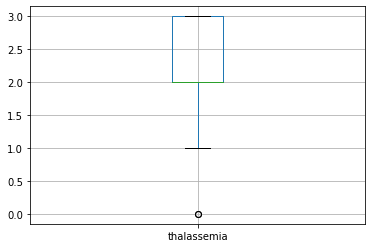

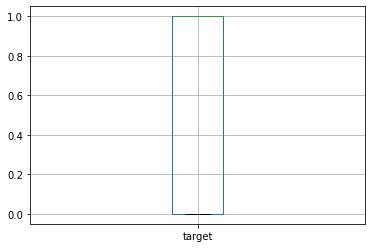

In [839]:
for x in df.columns:
    plt.figure()
    df.boxplot([x])

In [840]:
for i in df.columns:
    print('VARIABLE -> '+i)
    print(df[i].unique())

VARIABLE -> age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
VARIABLE -> sex
[1 0]
VARIABLE -> chest_pain_type
[3 2 1 0]
VARIABLE -> resting_blood_pressure
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
VARIABLE -> cholesterol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289

In [841]:
categorical_variables=df.loc[:,['sex','thalassemia','num_major_vessels','st_slope','exercise_induced_angina',
         'rest_ecg','fasting_blood_sugar','chest_pain_type']]
categorical_variables

,sex,thalassemia,num_major_vessels,st_slope,exercise_induced_angina,rest_ecg,fasting_blood_sugar,chest_pain_type
0,1,1,0,0,0,0,1,3
1,1,2,0,0,0,1,0,2
2,0,2,0,2,0,0,0,1
3,1,2,0,2,0,1,0,1
4,0,2,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...
298,0,3,0,1,1,1,0,0
299,1,3,0,1,0,1,0,3
300,1,3,2,1,0,1,1,0
301,1,3,1,1,1,1,0,0


In [842]:
numerical_variables=df.drop(['sex','thalassemia','num_major_vessels','st_slope','exercise_induced_angina',
         'rest_ecg','fasting_blood_sugar','chest_pain_type', 'target'], axis=1)
numerical_variables

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [843]:
from sklearn.preprocessing import MinMaxScaler

In [844]:
trans = MinMaxScaler()
data = trans.fit_transform(numerical_variables)
scaled_numerics = DataFrame(data)
scaled_numerics

,0,1,2,3,4
0,0.708333,0.481132,0.244292,0.603053,0.370968
1,0.166667,0.339623,0.283105,0.885496,0.564516
2,0.250000,0.339623,0.178082,0.770992,0.225806
3,0.562500,0.245283,0.251142,0.816794,0.129032
4,0.583333,0.245283,0.520548,0.702290,0.096774
...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258
299,0.333333,0.150943,0.315068,0.465649,0.193548
300,0.812500,0.471698,0.152968,0.534351,0.548387
301,0.583333,0.339623,0.011416,0.335878,0.193548


In [845]:
scaled_numerics.rename(columns={0:'age',1:"resting_blood_pressure", 2:"cholesterol", 3:"max_heart_rate_achieved", 4:"st_depression"}
              ,inplace=True)

In [846]:
scaled_numerics

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
0,0.708333,0.481132,0.244292,0.603053,0.370968
1,0.166667,0.339623,0.283105,0.885496,0.564516
2,0.250000,0.339623,0.178082,0.770992,0.225806
3,0.562500,0.245283,0.251142,0.816794,0.129032
4,0.583333,0.245283,0.520548,0.702290,0.096774
...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258
299,0.333333,0.150943,0.315068,0.465649,0.193548
300,0.812500,0.471698,0.152968,0.534351,0.548387
301,0.583333,0.339623,0.011416,0.335878,0.193548


In [847]:
encoded_categorics=pd.get_dummies(categorical_variables.astype(str),drop_first=True)
encoded_categorics.astype(int)

,sex_1,thalassemia_1,thalassemia_2,thalassemia_3,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,st_slope_1,st_slope_2,exercise_induced_angina_1,rest_ecg_1,rest_ecg_2,fasting_blood_sugar_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0
299,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
300,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0
301,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0


In [848]:
encoded_categorics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   sex_1                      303 non-null    uint8
 1   thalassemia_1              303 non-null    uint8
 2   thalassemia_2              303 non-null    uint8
 3   thalassemia_3              303 non-null    uint8
 4   num_major_vessels_1        303 non-null    uint8
 5   num_major_vessels_2        303 non-null    uint8
 6   num_major_vessels_3        303 non-null    uint8
 7   num_major_vessels_4        303 non-null    uint8
 8   st_slope_1                 303 non-null    uint8
 9   st_slope_2                 303 non-null    uint8
 10  exercise_induced_angina_1  303 non-null    uint8
 11  rest_ecg_1                 303 non-null    uint8
 12  rest_ecg_2                 303 non-null    uint8
 13  fasting_blood_sugar_1      303 non-null    uint8
 14  chest_pain_type_1         

In [849]:
df=pd.concat([scaled_numerics, encoded_categorics, df[['target']]], axis=1)
df

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,sex_1,thalassemia_1,thalassemia_2,thalassemia_3,num_major_vessels_1,...,st_slope_1,st_slope_2,exercise_induced_angina_1,rest_ecg_1,rest_ecg_2,fasting_blood_sugar_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,target
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0.166667,0.339623,0.283105,0.885496,0.564516,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,0.250000,0.339623,0.178082,0.770992,0.225806,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0.562500,0.245283,0.251142,0.816794,0.129032,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
4,0.583333,0.245283,0.520548,0.702290,0.096774,0,0,1,0,0,...,0,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
299,0.333333,0.150943,0.315068,0.465649,0.193548,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
300,0.812500,0.471698,0.152968,0.534351,0.548387,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
301,0.583333,0.339623,0.011416,0.335878,0.193548,1,0,0,1,1,...,1,0,1,1,0,0,0,0,0,0


In [850]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [851]:
df.columns.drop('target')

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'sex_1', 'thalassemia_1',
       'thalassemia_2', 'thalassemia_3', 'num_major_vessels_1',
       'num_major_vessels_2', 'num_major_vessels_3', 'num_major_vessels_4',
       'st_slope_1', 'st_slope_2', 'exercise_induced_angina_1', 'rest_ecg_1',
       'rest_ecg_2', 'fasting_blood_sugar_1', 'chest_pain_type_1',
       'chest_pain_type_2', 'chest_pain_type_3'],
      dtype='object')

In [852]:
a=df.drop(['target'],axis=1)
a

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,sex_1,thalassemia_1,thalassemia_2,thalassemia_3,num_major_vessels_1,...,num_major_vessels_4,st_slope_1,st_slope_2,exercise_induced_angina_1,rest_ecg_1,rest_ecg_2,fasting_blood_sugar_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0.166667,0.339623,0.283105,0.885496,0.564516,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0,0,1,0,0,...,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,0,0,0,1,0,...,0,1,0,1,1,0,0,0,0,0
299,0.333333,0.150943,0.315068,0.465649,0.193548,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
300,0.812500,0.471698,0.152968,0.534351,0.548387,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
301,0.583333,0.339623,0.011416,0.335878,0.193548,1,0,0,1,1,...,0,1,0,1,1,0,0,0,0,0


In [853]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns.drop('target')
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(a.values, i)
                          for i in range(len(a.columns))]

In [854]:
vif_data

,feature,VIF
0,age,12.769447
1,resting_blood_pressure,6.876459
2,cholesterol,7.458494
3,max_heart_rate_achieved,20.522614
4,st_depression,3.357572
5,sex_1,4.222005
6,thalassemia_1,4.150534
7,thalassemia_2,30.149387
8,thalassemia_3,23.344832
9,num_major_vessels_1,1.625448


In [855]:
vif_data[vif_data['VIF']<5].nunique()

feature    14
VIF        14
dtype: int64

In [856]:
vif_data=vif_data[vif_data['VIF']<5]
vif_data

,feature,VIF
4,st_depression,3.357572
5,sex_1,4.222005
6,thalassemia_1,4.150534
9,num_major_vessels_1,1.625448
10,num_major_vessels_2,1.553554
11,num_major_vessels_3,1.319397
12,num_major_vessels_4,1.078448
15,exercise_induced_angina_1,2.152680
16,rest_ecg_1,2.232005
17,rest_ecg_2,1.099893


In [857]:
vif_data['feature'].to_list()

['st_depression',
 'sex_1',
 'thalassemia_1',
 'num_major_vessels_1',
 'num_major_vessels_2',
 'num_major_vessels_3',
 'num_major_vessels_4',
 'exercise_induced_angina_1',
 'rest_ecg_1',
 'rest_ecg_2',
 'fasting_blood_sugar_1',
 'chest_pain_type_1',
 'chest_pain_type_2',
 'chest_pain_type_3']

In [858]:
df=df[['st_depression',
 'sex_1',
 'thalassemia_1',
 'num_major_vessels_1',
 'num_major_vessels_2',
 'num_major_vessels_3',
 'num_major_vessels_4',
 'exercise_induced_angina_1',
 'rest_ecg_1',
 'rest_ecg_2',
 'fasting_blood_sugar_1',
 'chest_pain_type_1',
 'chest_pain_type_2',
 'chest_pain_type_3','target']]
df

,st_depression,sex_1,thalassemia_1,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,exercise_induced_angina_1,rest_ecg_1,rest_ecg_2,fasting_blood_sugar_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,target
0,0.370968,1,1,0,0,0,0,0,0,0,1,0,0,1,1
1,0.564516,1,0,0,0,0,0,0,1,0,0,0,1,0,1
2,0.225806,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.129032,1,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0.096774,0,0,0,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.032258,0,0,0,0,0,0,1,1,0,0,0,0,0,0
299,0.193548,1,0,0,0,0,0,0,1,0,0,0,0,1,0
300,0.548387,1,0,0,1,0,0,0,1,0,1,0,0,0,0
301,0.193548,1,0,1,0,0,0,1,1,0,0,0,0,0,0


In [859]:
X=df.iloc[:,:-1]
X

,st_depression,sex_1,thalassemia_1,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,exercise_induced_angina_1,rest_ecg_1,rest_ecg_2,fasting_blood_sugar_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3
0,0.370968,1,1,0,0,0,0,0,0,0,1,0,0,1
1,0.564516,1,0,0,0,0,0,0,1,0,0,0,1,0
2,0.225806,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.129032,1,0,0,0,0,0,0,1,0,0,1,0,0
4,0.096774,0,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.032258,0,0,0,0,0,0,1,1,0,0,0,0,0
299,0.193548,1,0,0,0,0,0,0,1,0,0,0,0,1
300,0.548387,1,0,0,1,0,0,0,1,0,1,0,0,0
301,0.193548,1,0,1,0,0,0,1,1,0,0,0,0,0


In [860]:
y=df[['target']]
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [861]:
X=X.to_numpy()
X

array([[0.37096774, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.56451613, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.22580645, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.5483871 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19354839, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [862]:
y=y.to_numpy()
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [863]:
X=torch.from_numpy(X).type(torch.float32)
X

tensor([[0.3710, 1.0000, 1.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.5645, 1.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.2258, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        ...,
        [0.5484, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.1935, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000]])

In [864]:
X.dtype

torch.float32

In [865]:
X.shape

torch.Size([303, 14])

In [866]:
y=torch.from_numpy(y).type(torch.float32)
y

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [867]:
y.dtype

torch.float32

In [868]:
y_new=torch.tensor(df['target'])

In [869]:
y_new.shape

torch.Size([303])

In [870]:
data=TensorDataset(X,y_new)
data

In [871]:
import torch
import pandas as pd
from sklearn import datasets
import seaborn as sns
import torch.nn as nn
from torch.utils.data import random_split, DataLoader, TensorDataset
import torch.nn.functional as F

In [872]:
split = 0.1
rows = list(X.shape)[0]
test_split = int(rows*split)
val_split = int(rows*split*2)
train_split = rows - val_split - test_split

train_set, val_set, test_set = random_split(data, [train_split, val_split, test_split])

In [873]:
train_loader = DataLoader(train_set, 16, shuffle = True) #batch size = 16
val_loader = DataLoader(val_set) #batch size = 1
test_loader = DataLoader(test_set)

In [893]:
class HeartDisease(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 13)
        self.drop = nn.Dropout(0.01)
        self.linear2 = nn.Linear(13, output_size)

    def forward(self, x):
        x1 = self.linear1(x)
        x2 = self.drop(x1)
        outputs = self.linear2(x2)
        return outputs

    def training_step(self, batch):
        inputs, targets = batch
        outputs = self(inputs)
        loss = F.cross_entropy(outputs, targets)
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        outputs = self(inputs)
        loss = F.cross_entropy(outputs, targets)
        _, pred = torch.max(outputs, 1)
        accuracy = torch.tensor(torch.sum(pred==targets).item()/len(pred))
        return [loss.detach(), accuracy.detach()] 

In [894]:
def evaluate(model, loader):
    outputs = [model.validation_step(batch) for batch in loader]
    outputs = torch.tensor(outputs).T
    loss, accuracy = torch.mean(outputs, dim=1)
    return loss, accuracy

In [895]:
model = IrisModel(14, 2)
loss, accuracy = evaluate(model, val_loader)
"loss: ", loss.item(), "accuracy: ", accuracy.item()

('loss: ', 0.6601472496986389, 'accuracy: ', 0.6499999761581421)

In [896]:
def fit(model, train_loader, val_loader, epochs, lr, optimizer_function = torch.optim.Adam):
    history = {"loss" : [], "accuracy" : []}
    optimizer = optimizer_function(model.parameters(), lr)
    for epoch in range(epochs):
        print("Epoch ", epoch)
        #Train
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        #Validate
        for batch in val_loader:
            loss, accuracy = evaluate(model, val_loader)
        print("loss: ", loss.item(), "accuracy: ", accuracy.item(), "\n")
        history["loss"].append(loss.item())
        history["accuracy"].append(accuracy.item())
         
    return history

In [897]:
model = HeartDisease(14, 2) # 2 input features and 3 output categories
history = fit(model, train_loader, val_loader, 10, 0.01)
loss, accuracy = evaluate(model, test_loader)
print("Evaluation result: Loss: ", loss.item(), " Accuracy: ", accuracy.item())

Epoch  0
loss:  0.5855225920677185 accuracy:  0.7666666507720947 

Epoch  1
loss:  0.46588096022605896 accuracy:  0.8166666626930237 

Epoch  2
loss:  0.43569833040237427 accuracy:  0.8333333134651184 

Epoch  3
loss:  0.41707077622413635 accuracy:  0.800000011920929 

Epoch  4
loss:  0.4092119634151459 accuracy:  0.800000011920929 

Epoch  5
loss:  0.4064549505710602 accuracy:  0.8166666626930237 

Epoch  6
loss:  0.4024594724178314 accuracy:  0.8166666626930237 

Epoch  7
loss:  0.4011784493923187 accuracy:  0.8166666626930237 

Epoch  8
loss:  0.40789780020713806 accuracy:  0.8166666626930237 

Epoch  9
loss:  0.40817439556121826 accuracy:  0.800000011920929 

Evaluation result: Loss:  0.4502491354942322  Accuracy:  0.8333333134651184
